In [45]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from scipy import linalg
import scipy.io as sio
import pprint as pp
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import gc
# pre
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer
# Study
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
import matplotlib as mpl
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D

# helpers files
import infoStructure as ins
import helpers as hp
import display as dp
import clustering as ml
import importlib

In [2]:
SMLDDir = '/sanssauvegarde/homes/v18porti/info/Brest_Samples/'
BIGDDir = '/media/v18porti/ADATA SH14/stg/Brest/'
MDIR = BIGDDir

### Get LABELS

In [3]:
labels = ins.getFirstOneInfo(MDIR + 'RS10001/RS10001_170503_100212.mat')

### Get features info

In [4]:
vectorRRKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorRRKLD', 100)
vectorFAmpKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorFAmpKLD', 100)
vectorUFAmpKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorUFAmpKLD', 100)
vectorCorrKLD_ALL = ins.addAllPatientsInfo(MDIR, 'vectorCorrKLD', 100)

Working on vectorRRKLD - RS10000
Working on vectorRRKLD - RS10001
Working on vectorRRKLD - RS10002
Working on vectorRRKLD - RS10003
Working on vectorRRKLD - RS10004
Working on vectorRRKLD - RS10005
Working on vectorRRKLD - RS10006
Working on vectorRRKLD - RS10007
Working on vectorRRKLD - RS10008
Working on vectorRRKLD - RS10009
Working on vectorRRKLD - RS10010
Working on vectorRRKLD - RS10012
Working on vectorRRKLD - RS10013
Working on vectorRRKLD - RS10014
Working on vectorRRKLD - RS10015
Working on vectorRRKLD - RS10016
Working on vectorRRKLD - RS10017
Working on vectorRRKLD - RS10018
Working on vectorRRKLD - RS10019
Working on vectorRRKLD - RS10020
Working on vectorRRKLD - RS10021
Working on vectorRRKLD - RS10022
Working on vectorRRKLD - RS10023
Working on vectorRRKLD - RS10024
Working on vectorRRKLD - RS10025
Working on vectorRRKLD - RS10026
Working on vectorRRKLD - RS10027
Working on vectorRRKLD - RS10029
Working on vectorRRKLD - RS10032
Working on vectorRRKLD - RS10033
Working on

Working on vectorUFAmpKLD - RS10043
Working on vectorUFAmpKLD - RS10044
Working on vectorUFAmpKLD - RS10045
Working on vectorUFAmpKLD - RS10047
Working on vectorUFAmpKLD - RS10048
Working on vectorUFAmpKLD - RS10049
Working on vectorUFAmpKLD - RS10050
Working on vectorUFAmpKLD - RS10051
Working on vectorUFAmpKLD - RS10052
Working on vectorUFAmpKLD - RS10054
Working on vectorUFAmpKLD - RS10055
Working on vectorUFAmpKLD - RS10060
Working on vectorUFAmpKLD - RS10061
Working on vectorUFAmpKLD - RS10063
Working on vectorUFAmpKLD - RS10064
Working on vectorUFAmpKLD - RS10065
Working on vectorUFAmpKLD - RS10066
Working on vectorUFAmpKLD - RS10067
Working on vectorUFAmpKLD - RS10068
Working on vectorUFAmpKLD - RS10071
Working on vectorUFAmpKLD - RS10072
Working on vectorUFAmpKLD - RS10073
Working on vectorUFAmpKLD - RS10075
Working on vectorUFAmpKLD - RS10076
Working on vectorUFAmpKLD - RS10077
Working on vectorUFAmpKLD - RS10078
Value error: 

Did not read any bytes
Working on vectorUFAmpKLD 

In [5]:
print(vectorRRKLD_ALL.shape)
print(vectorFAmpKLD_ALL.shape)
print(vectorUFAmpKLD_ALL.shape)
print(vectorCorrKLD_ALL.shape)

(1428442,)
(1428442,)
(1428442,)
(1428442,)


### Tranform to a dataframe to be able to work better with it

In [6]:
df_ALL = hp.convertDictInDF(hp.putDataInDict(
        [vectorRRKLD_ALL, vectorFAmpKLD_ALL, vectorUFAmpKLD_ALL, vectorCorrKLD_ALL],
        ['vectorRRKLD_ALL', 'vectorFAmpKLD_ALL', 'vectorUFAmpKLD_ALL', 'vectorCorrKLD_ALL']
    ))

In [7]:
df_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428442 entries, 0 to 1428441
Data columns (total 4 columns):
vectorRRKLD_ALL       1428442 non-null float64
vectorFAmpKLD_ALL     1428442 non-null float64
vectorUFAmpKLD_ALL    1428442 non-null float64
vectorCorrKLD_ALL     1428442 non-null float64
dtypes: float64(4)
memory usage: 43.6 MB


In [8]:
df_ALL.describe()

,vectorRRKLD_ALL,vectorFAmpKLD_ALL,vectorUFAmpKLD_ALL,vectorCorrKLD_ALL
count,1.428442e+06,1.428442e+06,1.428442e+06,1.428442e+06
mean,1.694829e+01,5.475738e+00,2.328954e+01,1.780798e+01
std,3.392092e+00,3.586821e+00,1.007824e+01,1.062992e+01
min,7.270043e-01,8.552939e-01,2.079991e+00,2.062898e-01
25%,1.476141e+01,2.992229e+00,1.762610e+01,1.187016e+01
50%,1.743567e+01,3.820695e+00,2.123705e+01,1.504423e+01
75%,1.942440e+01,7.905198e+00,2.587078e+01,1.988023e+01
max,5.547591e+01,5.763879e+01,1.641051e+02,1.610461e+02


In [9]:
df_ALL.corr()

,vectorRRKLD_ALL,vectorFAmpKLD_ALL,vectorUFAmpKLD_ALL,vectorCorrKLD_ALL
vectorRRKLD_ALL,1.000000,-0.412718,0.175594,0.307118
vectorFAmpKLD_ALL,-0.412718,1.000000,0.019621,-0.319147
vectorUFAmpKLD_ALL,0.175594,0.019621,1.000000,0.940784
vectorCorrKLD_ALL,0.307118,-0.319147,0.940784,1.000000


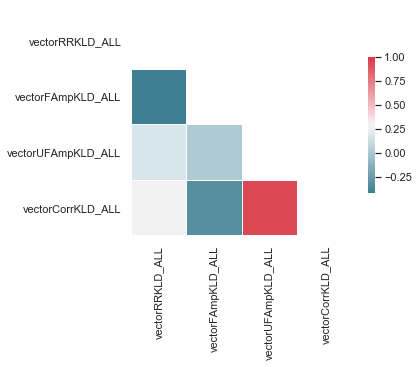

In [23]:
%matplotlib inline
dp.draw_correlation_matrix(df_ALL)

In [10]:
# sns.pairplot(df_ALL)

### Pre processing

In [11]:
len(df_ALL) - df_ALL.count()

vectorRRKLD_ALL       0
vectorFAmpKLD_ALL     0
vectorUFAmpKLD_ALL    0
vectorCorrKLD_ALL     0
dtype: int64

In [12]:
num_attribs = list(df_ALL)

pipeline = Pipeline([
        ('selector', hp.DataFrameSelector(num_attribs)), # to handle pandas data frame
        ('imputer', Imputer(strategy="median")), # fill missing values with median
        ('std_scaler', StandardScaler())
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ("main", pipeline),
    ])

data_prepared = full_pipeline.fit_transform(df_ALL)

In [13]:
df_normalized = hp.convertDictInDF(hp.putDataInDict(
        [data_prepared[:,0], data_prepared[:,1], data_prepared[:,2], data_prepared[:,3]],
        ['vectorRRKLD_N', 'vectorFAmpKLD_N', 'vectorUFAmpKLD_N', 'vectorCorrKLD_N']
    ))
df_normalized.describe()

,vectorRRKLD_N,vectorFAmpKLD_N,vectorUFAmpKLD_N,vectorCorrKLD_N
count,1.428442e+06,1.428442e+06,1.428442e+06,1.428442e+06
mean,-1.099906e-16,6.494381e-17,1.737008e-17,-3.056179e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.782091e+00,-1.288173e+00,-2.104489e+00,-1.655863e+00
25%,-6.447002e-01,-6.923986e-01,-5.619466e-01,-5.585947e-01
50%,1.436815e-01,-4.614233e-01,-2.036552e-01,-2.599969e-01
75%,7.299652e-01,6.773297e-01,2.561199e-01,1.949456e-01
max,1.135808e+01,1.454298e+01,1.397224e+01,1.347500e+01


### PCA

In [14]:
X = data_prepared

In [15]:
pca = PCA(n_components=3)
pca.fit(X)  
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)
print(pca.components_)

[0.53953978 0.31168212 0.14866588]
[1755.79188913 1334.49590405  921.65196115]
[[ 0.37037606 -0.30284456  0.58383877  0.65592609]
 [-0.54101742  0.67322726  0.45939398  0.20741834]
 [ 0.75506327  0.63127536  0.04181527 -0.1721115 ]]


In [16]:
X_New = pca.transform(X)
principalDf = pd.DataFrame(data=X_New, columns=['pc1', 'pc2', 'pc3'])

<IPython.core.display.Javascript object>


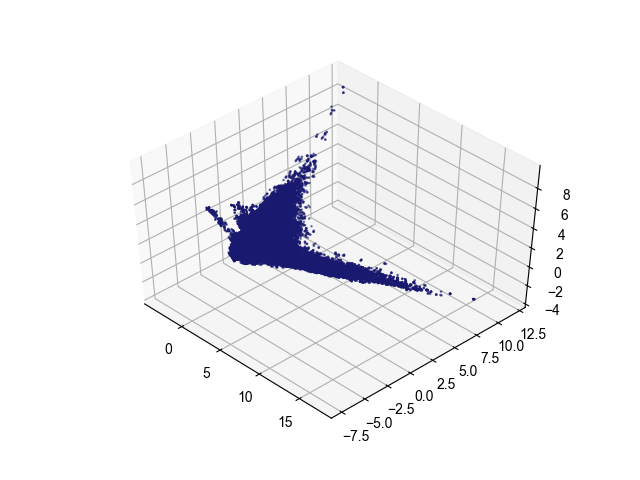

In [17]:
%matplotlib notebook
dp.print3dScatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'])

In [ ]:
plt.clf()
plt.close()

In [19]:
%matplotlib inline

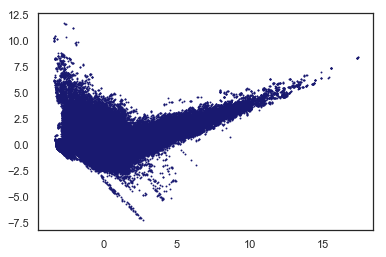

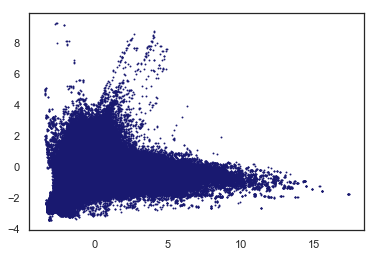

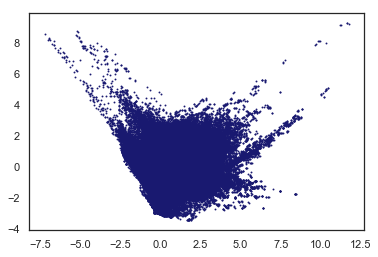

In [20]:
dp.printScatter(principalDf['pc1'], principalDf['pc2'])
dp.printScatter(principalDf['pc1'], principalDf['pc3'])
dp.printScatter(principalDf['pc2'], principalDf['pc3'])

In [21]:
titles = principalDf.columns.tolist()
principalDf.describe()

,pc1,pc2,pc3
count,1.428442e+06,1.428442e+06,1.428442e+06
mean,1.273408e-18,2.546816e-17,-4.297752e-17
std,1.469068e+00,1.116570e+00,7.711446e-01
min,-3.415618e+00,-7.237518e+00,-3.460255e+00
25%,-8.442526e-01,-8.385940e-01,-4.382902e-01
50%,-2.546473e-01,-2.499409e-01,1.455489e-02
75%,4.530847e-01,7.305116e-01,4.377087e-01
max,1.739893e+01,1.175799e+01,9.273657e+00


## ------{ X to use }-----

In [ ]:
X = X_New

## 1 Gaussian Mixture Model

https://scikit-learn.org/stable/unsupervised_learning.html


In [22]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

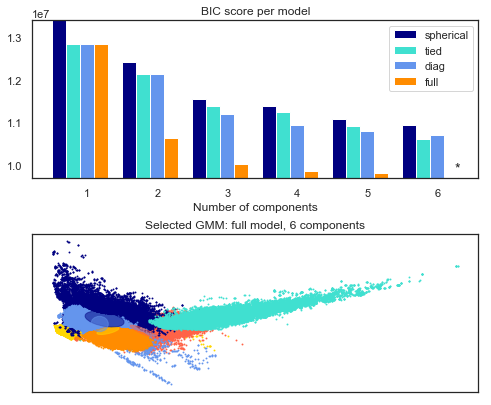

In [24]:
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange', 'gold', 'tomato'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
cnt = 0
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
    cnt += 1

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: full model, {cnt} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()
plt.clf()
plt.close()

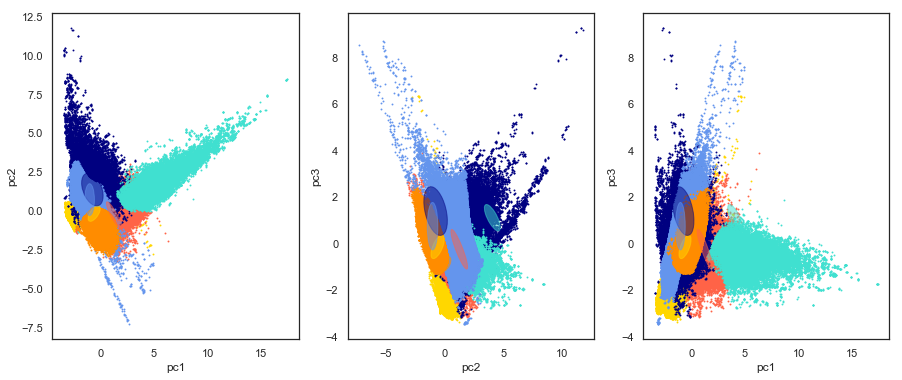

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.getPlotGMM(best_gmm, X, color_iter, 0, 1, ax[0], titles)
dp.getPlotGMM(best_gmm, X, color_iter, 1, 2, ax[1], titles)
dp.getPlotGMM(best_gmm, X, color_iter, 0, 2, ax[2], titles)
plt.show()
fig.clf()
plt.close()

In [ ]:
hp.getRepresentativeness(best_gmm, X, Y_)

## 2 K-Means

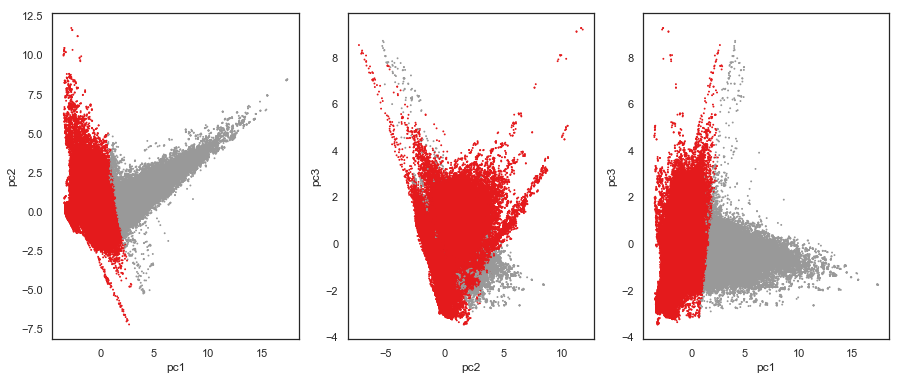

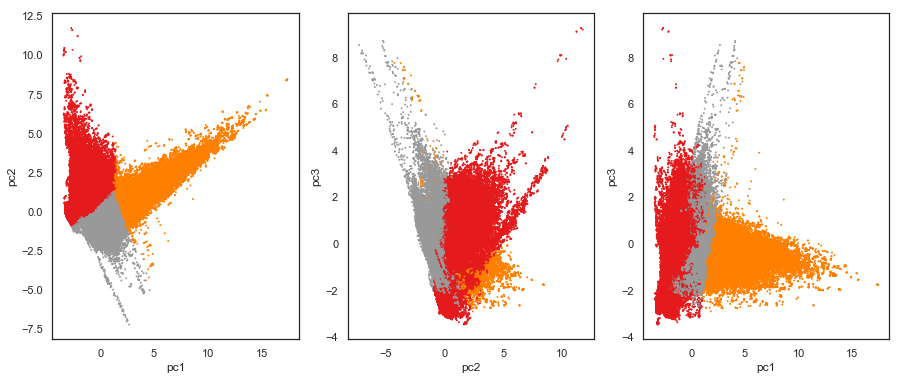

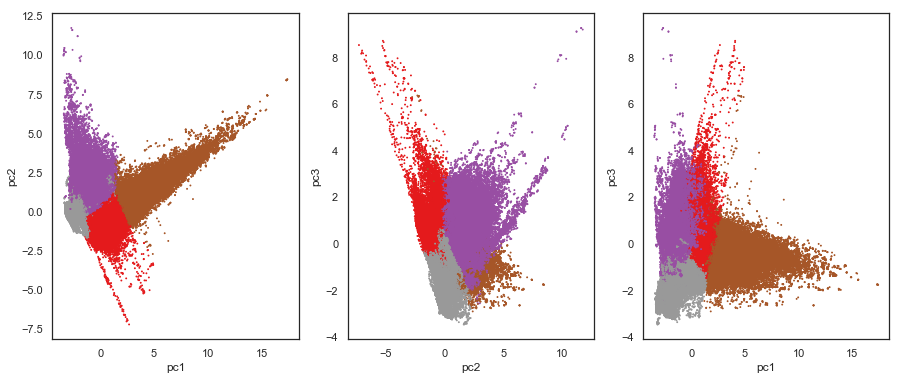

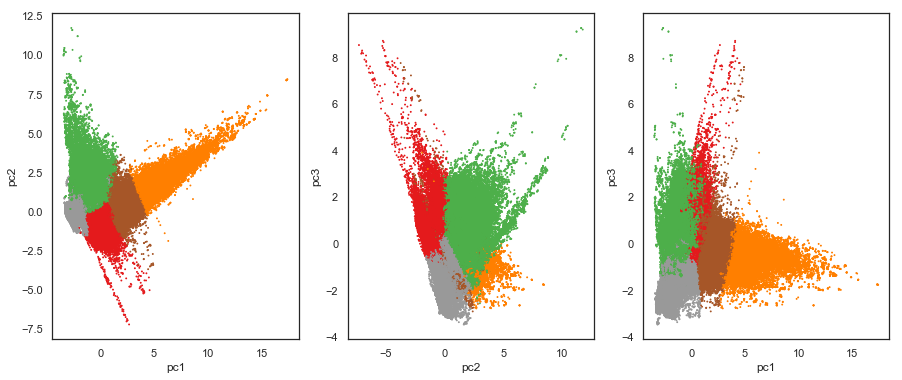

In [30]:
Y_, km = ml.getKmeanskClusters(2, X)
printThreeKMaeans(X, Y_, titles)
hp.getRepresentativeness(km, X, Y_)
Y_, km = ml.getKmeanskClusters(3, X)
printThreeKMaeans(X, Y_, titles)
hp.getRepresentativeness(km, X, Y_)
Y_, km = ml.getKmeanskClusters(4, X)
printThreeKMaeans(X, Y_, titles)
hp.getRepresentativeness(km, X, Y_)
Y_, km = ml.getKmeanskClusters(5, X)
printThreeKMaeans(X, Y_, titles)
hp.getRepresentativeness(km, X, Y_)

## 3 Mean Shift
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [34]:
bandwidth = estimate_bandwidth(X, n_samples=50000, random_state=1)
bandwidth

1.7604545964278784

In [35]:
ms, n_clusters_, cluster_centers, labels = ml.meanClustering(X, bandwidth)
hp.getRepresentativeness(ms, X, ms.predict(X))

number of estimated clusters : 7


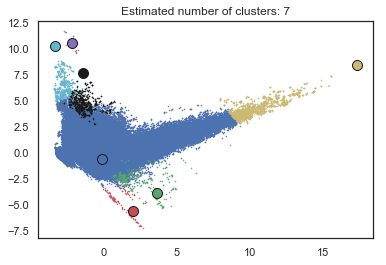

In [40]:
dp.plotMSh(X, ms, n_clusters_, cluster_centers, labels)

In [65]:
ms1, n_clusters_1, cluster_centers1, labels1 = ml.meanClustering(X, 2)
hp.getRepresentativeness(ms1, X, ms1.predict(X))

number of estimated clusters : 4


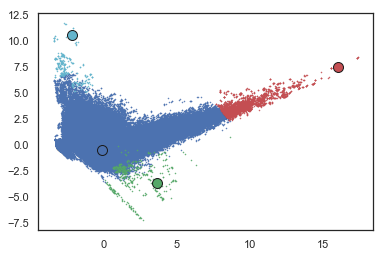

In [71]:
dp.plotMSh(X, ms1, n_clusters_1, cluster_centers1, labels1)

## 4 Variational Bayesian Gaussian Mixture

<module 'helpers' from '/homes/v18porti/Documents/code/imt_stg/helpers.py'>

In [51]:
dpgmm1 = BayesianGaussianMixture(n_components=5,
                                max_iter=200, n_init=2,
                                covariance_type='full').fit(X)
#print(dpgmm1.means_)
#print(dpgmm1.covariances_)
hp.getRepresentativeness(dpgmm1, X, dpgmm1.predict(X))

[[-0.03492759 -0.84462756 -0.00570802]
 [ 0.21905005 -0.02481242 -0.88467147]
 [-1.0082106   0.84114447  0.33654623]
 [-0.356952    1.54257469  0.50063122]
 [ 2.7887001   0.37859784 -0.30115435]]
[[[ 3.44259155e-01 -3.10716959e-03  1.20594150e-01]
  [-3.10716959e-03  2.12434649e-01 -1.51959234e-01]
  [ 1.20594150e-01 -1.51959234e-01  2.35809904e-01]]

 [[ 2.54202199e+00  2.04175363e-01  1.18587464e+00]
  [ 2.04175363e-01  2.05844754e-01 -4.70311081e-02]
  [ 1.18587464e+00 -4.70311081e-02  7.43872348e-01]]

 [[ 3.16125643e-01 -2.28146277e-01  2.73538708e-01]
  [-2.28146277e-01  6.99685310e-01 -1.00216058e-01]
  [ 2.73538708e-01 -1.00216058e-01  6.91414048e-01]]

 [[ 8.29826836e-01 -6.99044755e-01 -5.56781132e-02]
  [-6.99044755e-01  1.50288991e+00  2.79587377e-01]
  [-5.56781132e-02  2.79587377e-01  7.57896878e-01]]

 [[ 4.41820585e+00  2.23423828e+00 -3.18205019e-01]
  [ 2.23423828e+00  1.39050610e+00 -3.85175962e-01]
  [-3.18205019e-01 -3.85175962e-01  2.76279511e-01]]]


/usr/lib/python3/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [52]:
dpgmm2 = BayesianGaussianMixture(n_components=5,
                                max_iter=100, n_init=2,
                                covariance_type='full').fit(X)
#print(dpgmm2.means_)
#print(dpgmm2.covariances_)
hp.getRepresentativeness(dpgmm2, X, dpgmm2.predict(X))

[[-0.03492759 -0.84462756 -0.00570802]
 [ 0.21905005 -0.02481242 -0.88467147]
 [-1.0082106   0.84114447  0.33654623]
 [-0.356952    1.54257469  0.50063122]
 [ 2.7887001   0.37859784 -0.30115435]]
[[[ 3.44259155e-01 -3.10716959e-03  1.20594150e-01]
  [-3.10716959e-03  2.12434649e-01 -1.51959234e-01]
  [ 1.20594150e-01 -1.51959234e-01  2.35809904e-01]]

 [[ 2.54202199e+00  2.04175363e-01  1.18587464e+00]
  [ 2.04175363e-01  2.05844754e-01 -4.70311081e-02]
  [ 1.18587464e+00 -4.70311081e-02  7.43872348e-01]]

 [[ 3.16125643e-01 -2.28146277e-01  2.73538708e-01]
  [-2.28146277e-01  6.99685310e-01 -1.00216058e-01]
  [ 2.73538708e-01 -1.00216058e-01  6.91414048e-01]]

 [[ 8.29826836e-01 -6.99044755e-01 -5.56781132e-02]
  [-6.99044755e-01  1.50288991e+00  2.79587377e-01]
  [-5.56781132e-02  2.79587377e-01  7.57896878e-01]]

 [[ 4.41820585e+00  2.23423828e+00 -3.18205019e-01]
  [ 2.23423828e+00  1.39050610e+00 -3.85175962e-01]
  [-3.18205019e-01 -3.85175962e-01  2.76279511e-01]]]


/usr/lib/python3/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [53]:
dpgmm3 = BayesianGaussianMixture(n_components=5,
                                max_iter=200,
                                covariance_type='full').fit(X)
#print(dpgmm3.means_)
#print(dpgmm3.covariances_)
hp.getRepresentativeness(dpgmm3, X, dpgmm3.predict(X))

[[-0.03492759 -0.84462756 -0.00570802]
 [ 0.21905005 -0.02481242 -0.88467147]
 [-1.0082106   0.84114447  0.33654623]
 [-0.356952    1.54257469  0.50063122]
 [ 2.7887001   0.37859784 -0.30115435]]
[[[ 3.44259155e-01 -3.10716959e-03  1.20594150e-01]
  [-3.10716959e-03  2.12434649e-01 -1.51959234e-01]
  [ 1.20594150e-01 -1.51959234e-01  2.35809904e-01]]

 [[ 2.54202199e+00  2.04175363e-01  1.18587464e+00]
  [ 2.04175363e-01  2.05844754e-01 -4.70311081e-02]
  [ 1.18587464e+00 -4.70311081e-02  7.43872348e-01]]

 [[ 3.16125643e-01 -2.28146277e-01  2.73538708e-01]
  [-2.28146277e-01  6.99685310e-01 -1.00216058e-01]
  [ 2.73538708e-01 -1.00216058e-01  6.91414048e-01]]

 [[ 8.29826836e-01 -6.99044755e-01 -5.56781132e-02]
  [-6.99044755e-01  1.50288991e+00  2.79587377e-01]
  [-5.56781132e-02  2.79587377e-01  7.57896878e-01]]

 [[ 4.41820585e+00  2.23423828e+00 -3.18205019e-01]
  [ 2.23423828e+00  1.39050610e+00 -3.85175962e-01]
  [-3.18205019e-01 -3.85175962e-01  2.76279511e-01]]]


/usr/lib/python3/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [54]:
dpgmm4 = BayesianGaussianMixture(n_components=5,
                                max_iter=100,
                                covariance_type='full').fit(X)
#print(dpgmm4.means_)
#print(dpgmm4.covariances_)
hp.getRepresentativeness(dpgmm4, X, dpgmm4.predict(X))

[[-0.03492759 -0.84462756 -0.00570802]
 [ 0.21905005 -0.02481242 -0.88467147]
 [-1.0082106   0.84114447  0.33654623]
 [-0.356952    1.54257469  0.50063122]
 [ 2.7887001   0.37859784 -0.30115435]]
[[[ 3.44259155e-01 -3.10716959e-03  1.20594150e-01]
  [-3.10716959e-03  2.12434649e-01 -1.51959234e-01]
  [ 1.20594150e-01 -1.51959234e-01  2.35809904e-01]]

 [[ 2.54202199e+00  2.04175363e-01  1.18587464e+00]
  [ 2.04175363e-01  2.05844754e-01 -4.70311081e-02]
  [ 1.18587464e+00 -4.70311081e-02  7.43872348e-01]]

 [[ 3.16125643e-01 -2.28146277e-01  2.73538708e-01]
  [-2.28146277e-01  6.99685310e-01 -1.00216058e-01]
  [ 2.73538708e-01 -1.00216058e-01  6.91414048e-01]]

 [[ 8.29826836e-01 -6.99044755e-01 -5.56781132e-02]
  [-6.99044755e-01  1.50288991e+00  2.79587377e-01]
  [-5.56781132e-02  2.79587377e-01  7.57896878e-01]]

 [[ 4.41820585e+00  2.23423828e+00 -3.18205019e-01]
  [ 2.23423828e+00  1.39050610e+00 -3.85175962e-01]
  [-3.18205019e-01 -3.85175962e-01  2.76279511e-01]]]


/usr/lib/python3/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


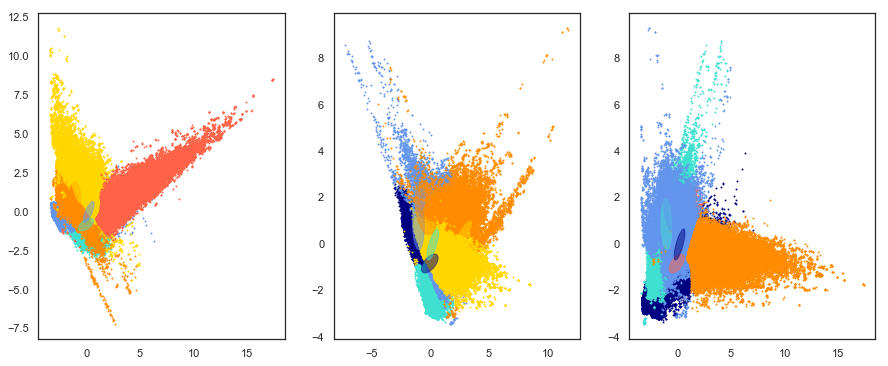

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

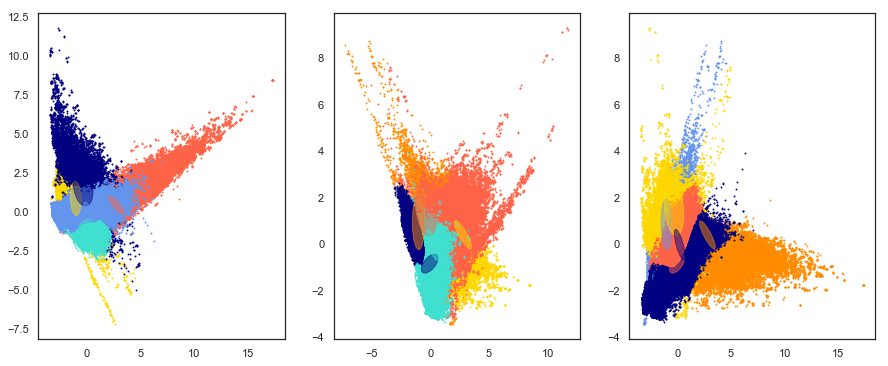

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, dpgmm1.predict(X), dpgmm1.means_, dpgmm1.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, dpgmm1.predict(X), dpgmm1.means_, dpgmm1.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, dpgmm1.predict(X), dpgmm1.means_, dpgmm1.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

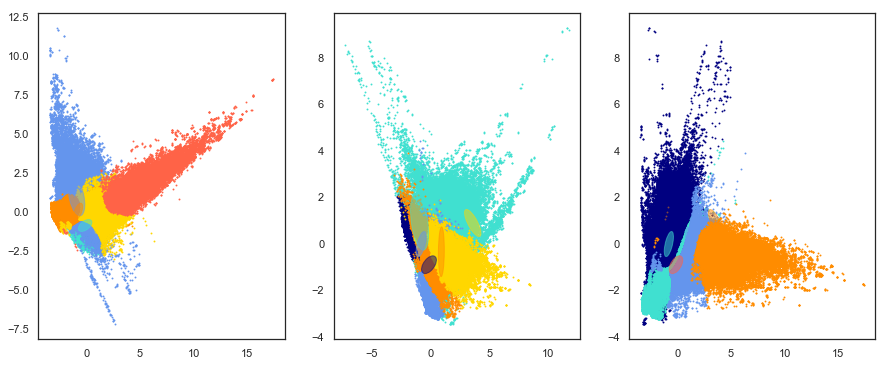

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, dpgmm2.predict(X), dpgmm2.means_, dpgmm2.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, dpgmm2.predict(X), dpgmm2.means_, dpgmm2.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, dpgmm2.predict(X), dpgmm2.means_, dpgmm2.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

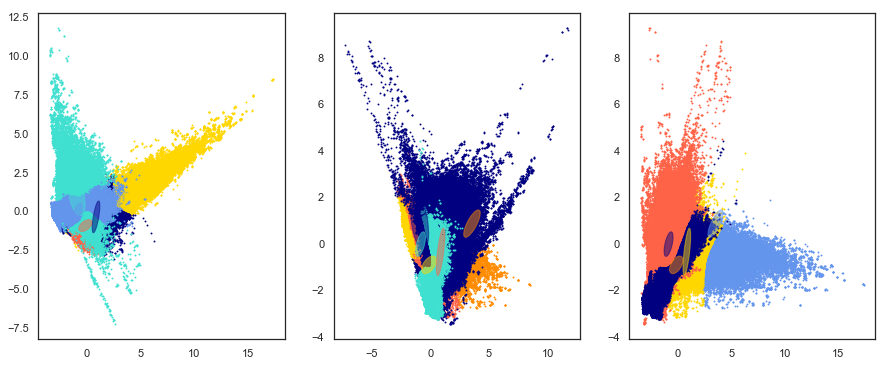

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, dpgmm3.predict(X), dpgmm3.means_, dpgmm3.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, dpgmm3.predict(X), dpgmm3.means_, dpgmm3.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, dpgmm3.predict(X), dpgmm3.means_, dpgmm3.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

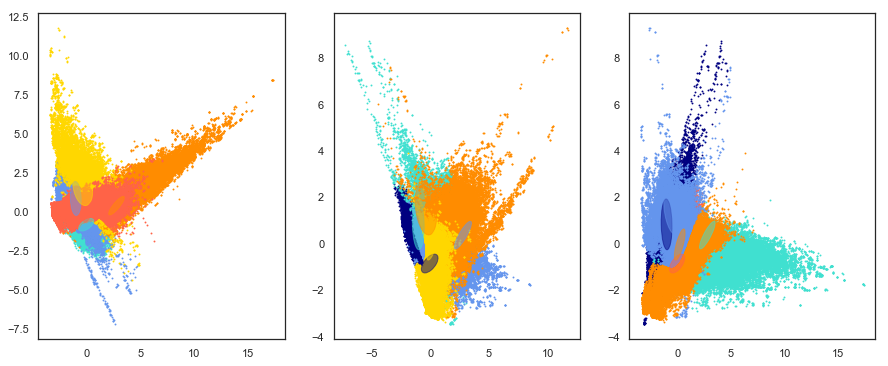

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dp.plotGM(X, dpgmm4.predict(X), dpgmm4.means_, dpgmm4.covariances_, ax[0], 0, 1, color_iter)
dp.plotGM(X, dpgmm4.predict(X), dpgmm4.means_, dpgmm4.covariances_, ax[1], 1, 2, color_iter)
dp.plotGM(X, dpgmm4.predict(X), dpgmm4.means_, dpgmm4.covariances_, ax[2], 0, 2, color_iter)
plt.show()
fig.clf()
plt.close()

In [112]:
r = hp.getRepresentativeness(dpgmm2, X, dpgmm2.predict(X))